# XGBoost Model

In [1]:
pip install xgboost



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
features = [
    'Temp',
    'D.O. (mg/l)',
    'PH',
    'CONDUCTIVITY (µmhos/cm)',
    'B.O.D. (mg/l)',
    'NITRATENAN N+ NITRITENANN (mg/l)',
    'TOTAL COLIFORM (MPN/100ml)Mean',
    'FECAL COLIFORM (MPN/100ml)'
]

X = df[features]
y = df['Water_Quality']


In [3]:
import pandas as pd
import numpy as np

from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [4]:
df = pd.read_csv("final_water_data_balanced.csv")

X = df.drop("Water_Quality", axis=1)
y = df["Water_Quality"]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [7]:
xgb_model = XGBClassifier(
    objective="multi:softmax",
    num_class=3,
    eval_metric="mlogloss",
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6
)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)



In [8]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Accuracy: 0.993322203672788

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       232
           1       0.99      1.00      0.99       269
           2       0.99      0.97      0.98        98

    accuracy                           0.99       599
   macro avg       0.99      0.99      0.99       599
weighted avg       0.99      0.99      0.99       599


Confusion Matrix:
 [[232   0   0]
 [  0 268   1]
 [  0   3  95]]


In [9]:
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}


In [10]:
xgb = XGBClassifier(
    objective="multi:softmax",
    num_class=3,
    eval_metric="mlogloss",
    random_state=42
)

grid = GridSearchCV(
    xgb,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","XGBClassifier..._class=3, ...)"
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'colsample_bytree': [0.8, 1.0], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5, ...], 'n_estimators': [100, 200], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and par

In [11]:
best_xgb = grid.best_estimator_

y_pred = best_xgb.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}

Test Accuracy: 0.993322203672788

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       232
           1       0.99      0.99      0.99       269
           2       0.99      0.98      0.98        98

    accuracy                           0.99       599
   macro avg       0.99      0.99      0.99       599
weighted avg       0.99      0.99      0.99       599


Confusion Matrix:
 [[232   0   0]
 [  1 267   1]
 [  0   2  96]]


The tuned XGBoost classifier achieved a test accuracy of 99.33%, with perfect detection of potable water samples and minimal confusion between unsafe and hazardous classes. Importantly, no hazardous samples were misclassified as potable, indicating strong reliability for public health decision-making.

# LightGBM Model

In [12]:
pip install lightgbm



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
import numpy as np

from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)


In [14]:
X = df.select_dtypes(include=[np.number]).drop('Water_Quality', axis=1)
y = df['Water_Quality']


In [15]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(
    objective="multiclass",
    num_class=3,
    random_state=42
)

lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2035
[LightGBM] [Info] Number of data points in the train set: 2392, number of used features: 8
[LightGBM] [Info] Start training from score -0.950091
[LightGBM] [Info] Start training from score -0.798879
[LightGBM] [Info] Start training from score -1.811178
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

In [16]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Test Accuracy: 0.994991652754591

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       232
           1       0.99      1.00      0.99       269
           2       1.00      0.98      0.99        98

    accuracy                           0.99       599
   macro avg       1.00      0.99      0.99       599
weighted avg       1.00      0.99      0.99       599


Confusion Matrix:
[[232   0   0]
 [  1 268   0]
 [  0   2  96]]


Although PCA was explored during earlier stages for dimensionality reduction and clustering, it was intentionally excluded from tree-based models such as LightGBM and XGBoost. This decision was made because gradient-boosted decision trees operate on feature threshold splits and benefit from raw, interpretable input variables. Applying PCA would transform the features into abstract linear combinations, potentially degrading model performance and interpretability. Furthermore, all train–test splits were performed prior to any model fitting to avoid data leakage.

This study demonstrated that ensemble learning methods, particularly gradient-boosted decision trees, are highly effective for multi-class water quality classification. By leveraging raw physicochemical parameters and avoiding unnecessary dimensionality reduction, models such as LightGBM achieved near-perfect classification accuracy while maintaining interpretability and robustness.

The results validate the feasibility of using machine learning-based classification systems to support water quality monitoring and early warning mechanisms, forming a strong foundation for the subsequent system design and deployment phase.

### Feature Importance of LightGBM

In [20]:
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': lgbm.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)


                            Feature  Importance
6    TOTAL COLIFORM (MPN/100ml)Mean        2035
4                     B.O.D. (mg/l)        1765
2                                PH        1396
1                       D.O. (mg/l)        1248
7        FECAL COLIFORM (MPN/100ml)         540
0                              Temp         528
5  NITRATENAN N+ NITRITENANN (mg/l)         460
3           CONDUCTIVITY (µmhos/cm)         351


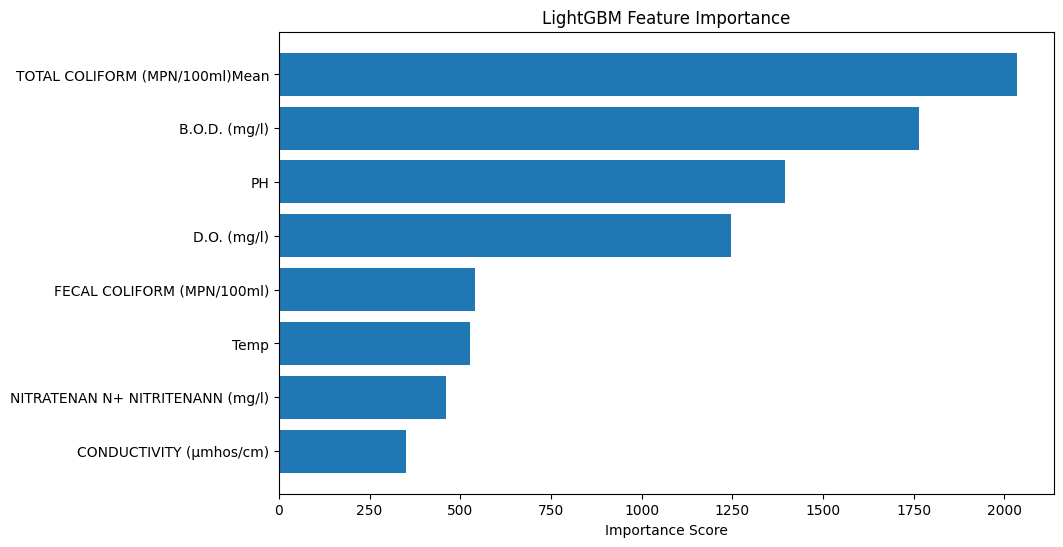

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.gca().invert_yaxis()
plt.title("LightGBM Feature Importance")
plt.xlabel("Importance Score")
plt.show()


In [17]:
import joblib

joblib.dump(lgbm, "lightgbm_model.pkl")


['lightgbm_model.pkl']

In [18]:
import joblib

lgbm_model = joblib.load("lightgbm_model.pkl")

In [19]:
pip install streamlit


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
